# Econ 441b HW 3

In [1]:
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
y = pd.read_csv('AAPL_quarterly_financials.csv')
y.index =y.name
y= pd.DataFrame(y.loc['BasicEPS', :]).iloc[2:,:]
y.index = pd.to_datetime(y.index)
#chech if Nas are no dividend period
y.sort_index().fillna(0.)

,BasicEPS
1985-09-30,0.0
1985-12-31,0.004
1986-03-31,0.002
1986-06-30,0.002
1986-09-30,0.0
...,...
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53
2023-06-30,1.27


# 1.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [3]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.


In [4]:
from pytrends.request import TrendReq

In [19]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["Iphone", "Covid","Huawei","Interest Rates", "ucla","Tylor Swift tickets", "Apple Share"]  
# Add your keywords here: Covid, Huawei, war, ucla, chip storage, Tylor Swift tickets.
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    #time.sleep(5)
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [20]:
X = df.resample('Q').mean()
X

,Iphone,Covid,Huawei,Interest Rates,ucla,Tylor Swift tickets,Apple Share
date,,,,,,,
2004-03-31,0.000000,0.000000,0.0,60.000000,88.333333,0.000000,9.666667
2004-06-30,0.000000,0.000000,1.0,64.333333,82.666667,0.000000,8.333333
2004-09-30,0.000000,0.000000,1.0,53.000000,74.333333,22.666667,8.000000
2004-12-31,0.000000,0.000000,1.0,46.333333,85.000000,33.333333,9.333333
2005-03-31,0.000000,0.000000,1.0,48.333333,82.666667,13.333333,12.000000
...,...,...,...,...,...,...,...
2023-03-31,46.000000,7.666667,28.0,83.000000,41.333333,2.666667,53.666667
2023-06-30,44.666667,5.000000,26.0,73.000000,29.000000,6.333333,49.666667
2023-09-30,53.333333,6.000000,28.0,73.666667,29.000000,13.333333,59.000000


In [21]:
# fix data
temp = pd.concat([y,X],axis =1).dropna()
y = temp[['BasicEPS']].copy()
X = temp.iloc[:,1:].copy()

# 2.)  Normalize all the X dataImport data. 

In [22]:
scaler = StandardScaler()

In [23]:
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .1. Plot a bar chart.

In [24]:
lasso = Lasso (alpha=0.1)

In [25]:
lasso.fit(X_scaled,y)


Lasso(alpha=0.1)

In [26]:
coef = lasso.coef_
coef

array([ 0.00445588,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.34972203])

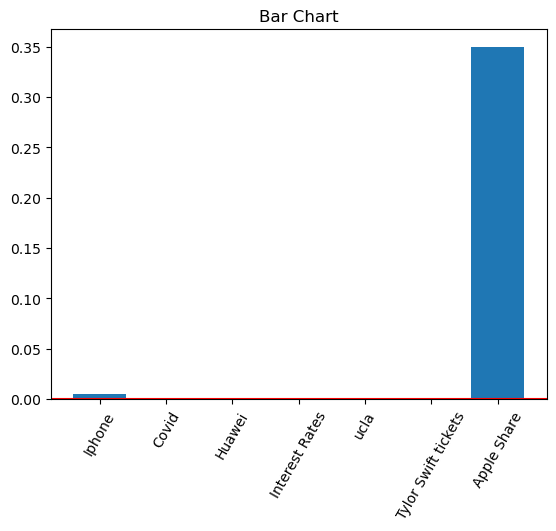

In [27]:
import matplotlib.pyplot as plt
plt.bar(range(len(coef)),coef)
plt.xticks(range(len(coef)), X.columns, rotation=60)
plt.axhline(0,color ='r')
plt.title('Bar Chart')
plt.show()


# 4)Run a Lasso with lambda of .5. Plot a bar chart.

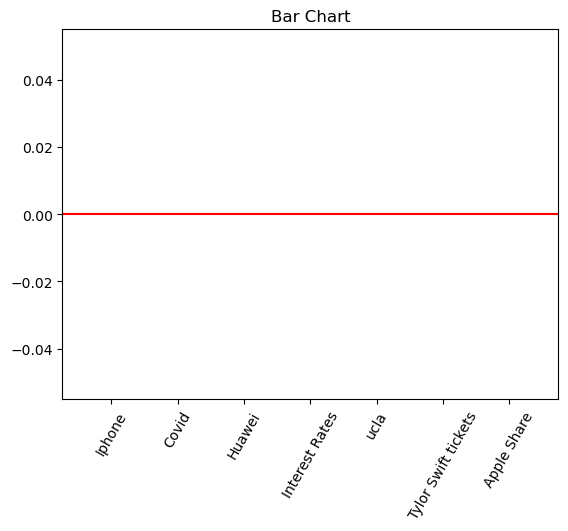

In [29]:
lasso = Lasso (alpha=0.5)
lasso.fit(X_scaled,y)
coef = lasso.coef_
coef
plt.bar(range(len(coef)),coef)
plt.xticks(range(len(coef)), X.columns, rotation=60)
plt.axhline(0,color ='r')
plt.title('Bar Chart')
plt.show()

But if the we use the lambda 0.5. We will find that all become zero which means no important impact on earnings for all these variables. So it is important to choose lamda.

# 5.) Do these coefficient magnitudes make sense?

It means when we could consider apple share and iphone as an important search term when nowcasting earnings. Other coeffients of variables like covid, ucla, Tylor Swift tichkets that are not related to the earnings are obvious to be zero.